In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import utils as u
import math
import sys
import tkinter as tk


In [62]:
window = tk.Tk()
window.mainloop()

In [2]:
fs = 500
data = pd.read_csv('coorteeqsrafva.csv', sep=';', header=0, index_col=0)
data = list(data['diagnosi'])

signals = np.load('ecgeq-500hzsrfava.npy')

In [3]:
data_unique = set(data)
dict_by_rythm = {}
for rythm in data_unique:
    dict_by_rythm[rythm] = []

for i in range(len(signals)):
    dict_by_rythm[data[i]].append(np.array(signals[i,:,:]))

# dict_by_rythm['AFLT'][0][:,0]
y = np.arange(0,10,1/fs)

In [30]:
def filtrar_señal(señal, fs, correct_signal = False, moving_average = False):
    if correct_signal:
        return u.integrador(u.correct_signal(u.pasabanda(u.med_filt(señal, fs), fs= fs, lowcut= 0.5, highcut= 50),fs),fs, largo_ventana= 0.01)
    else:

        if moving_average:
            return u.integrador(u.pasabanda(u.med_filt(señal, fs), fs= fs, lowcut= 0.5, highcut= 50),fs, largo_ventana= 0.05)
        else:
            return u.pasabanda(u.med_filt(señal, fs), fs= fs, lowcut= 0.5, highcut= 50)


SVARR


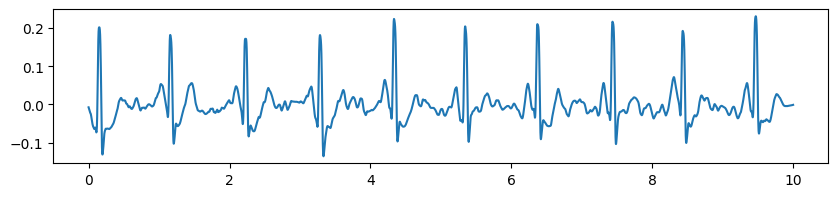

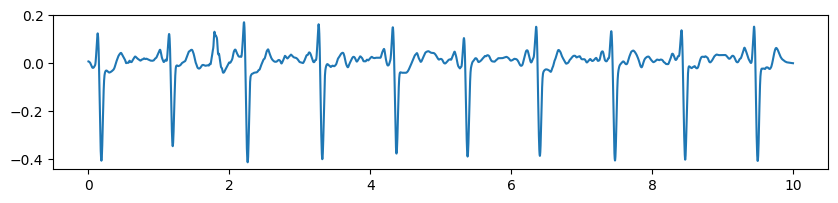

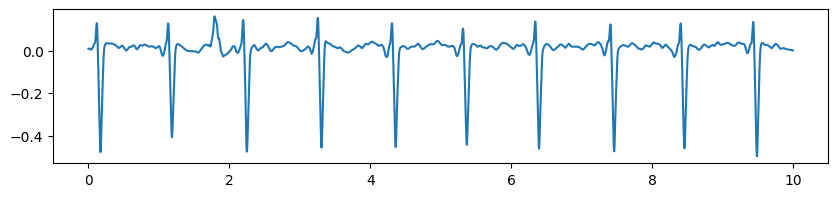

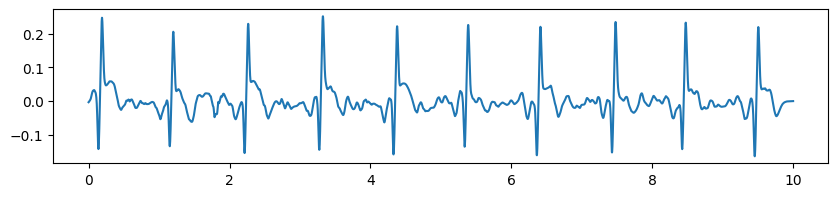

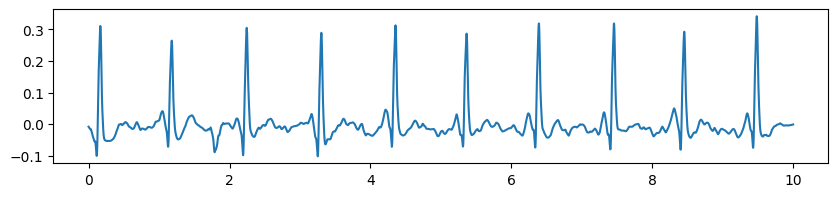

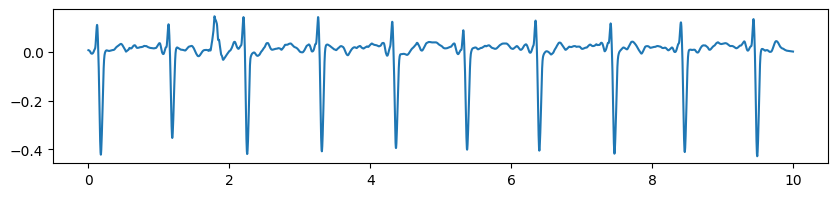

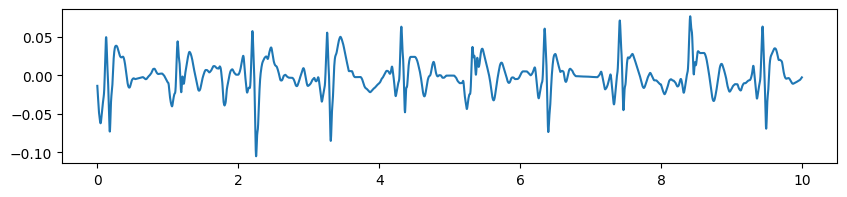

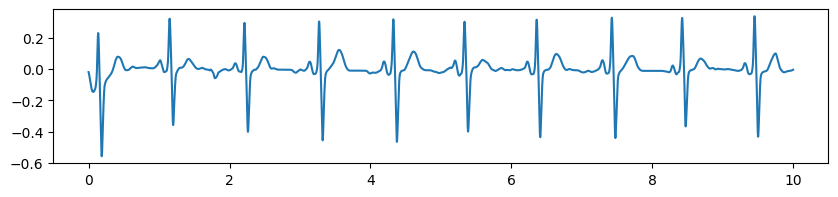

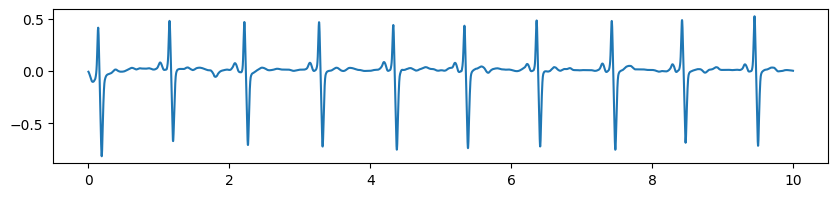

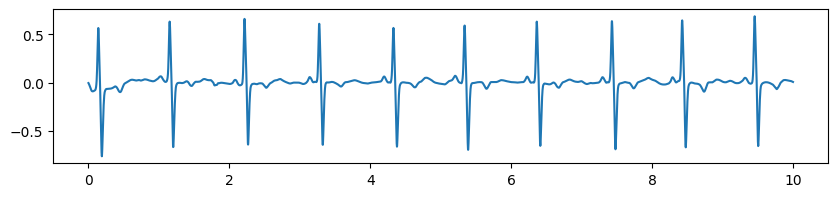

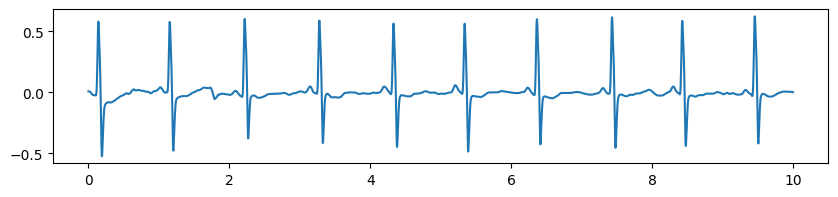

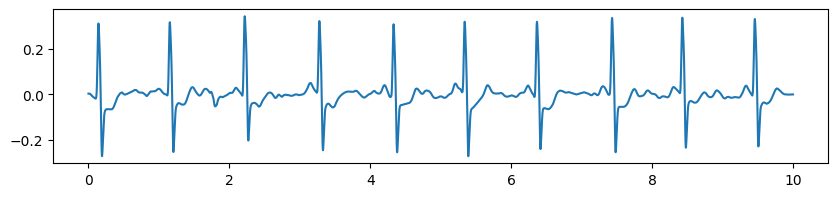

------------------------------------


In [54]:
dato = list(data_unique)[1]
print(dato)
inicio = 0
fin = 1
cant_de_repeticiones = 1
y = np.arange(0,10*cant_de_repeticiones,1/fs)
for i in range(inicio,fin):    
    X = dict_by_rythm[dato]
    for j in range(12):
        plt.figure(figsize=(10, 2))
        X_filt_real = filtrar_señal(X[i][:,j],fs)
        X_filt_real_average = filtrar_señal(X[i][:,j],fs,moving_average=True)
        X_filt = []
        X_filt_average = []
        for i in range(cant_de_repeticiones):
            X_filt = X_filt + list(X_filt_real)
            X_filt_average = X_filt_average + list(X_filt_real_average)
       # plt.plot(y,X_filt)
        plt.plot(y,X_filt_average)
        plt.show()
    
    print('------------------------------------')

SVARR


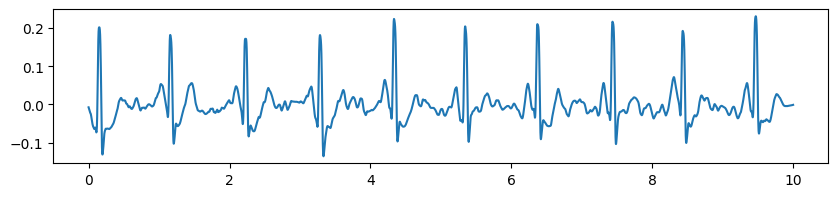

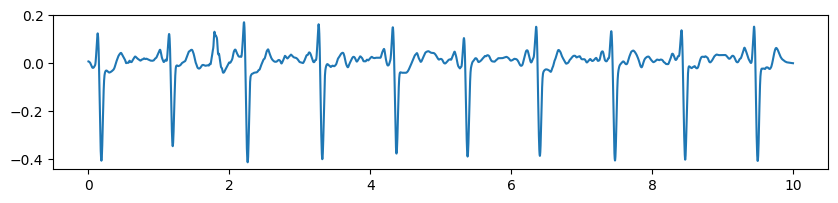

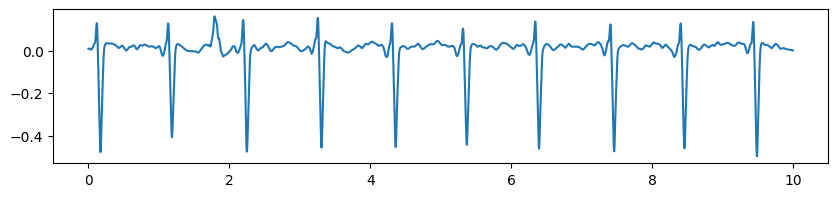

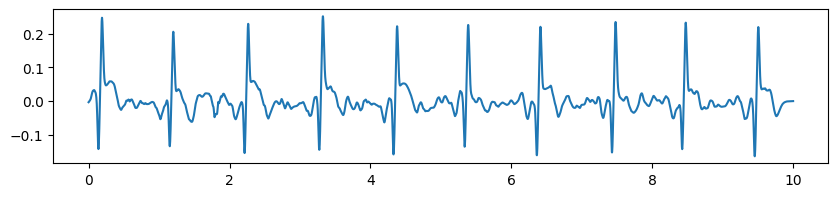

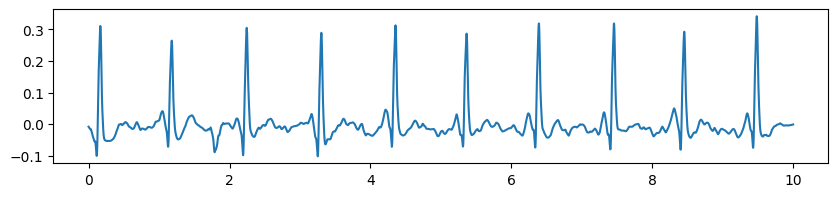

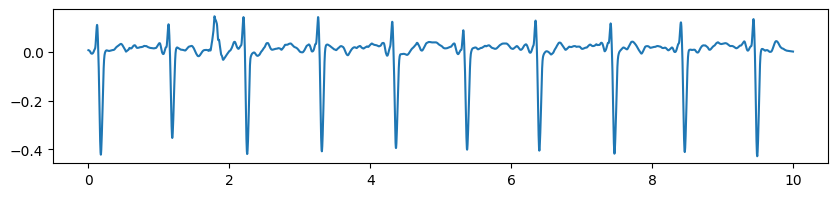

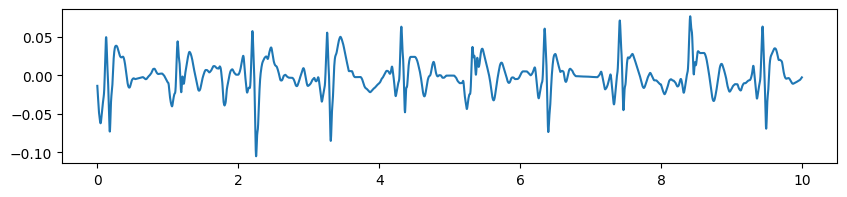

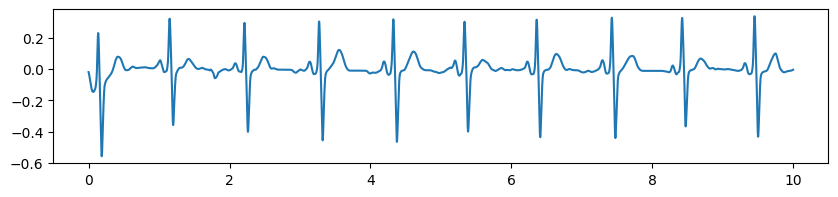

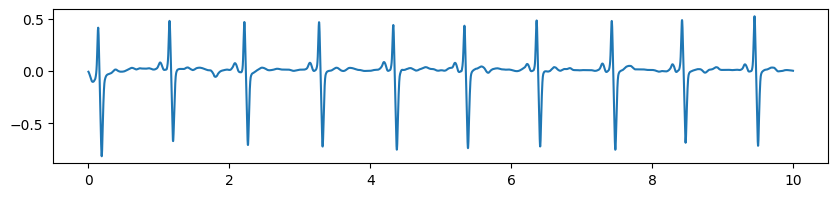

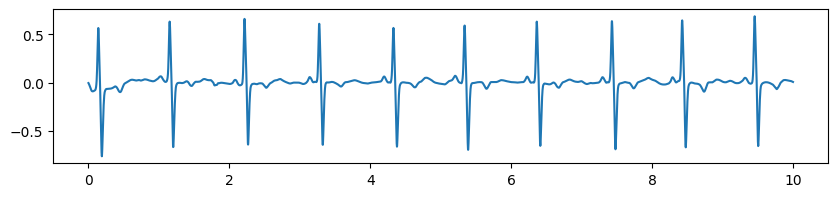

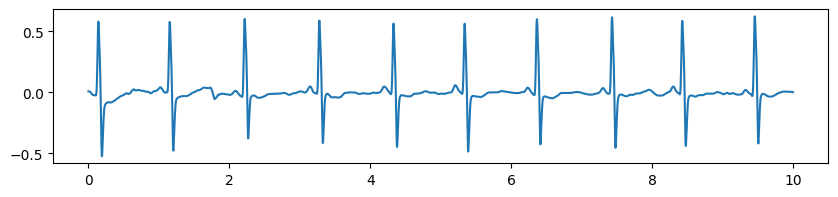

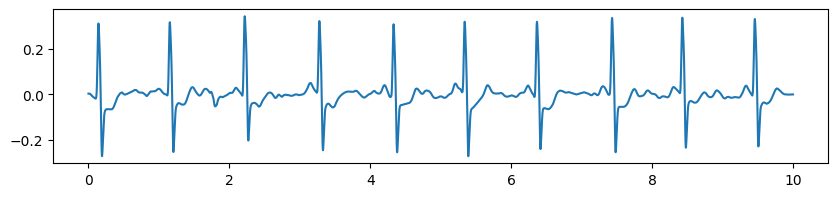

------------------------------------


In [27]:
dato = list(data_unique)[1]
print(dato)
inicio = 0
fin = 1
for i in range(inicio,fin):    
    X = dict_by_rythm[dato]
    for j in range(12):
        plt.figure(figsize=(10, 2))
        plt.plot(y,filtrar_señal(X[i][:,j], 500))
        plt.show()
    
    print('------------------------------------')

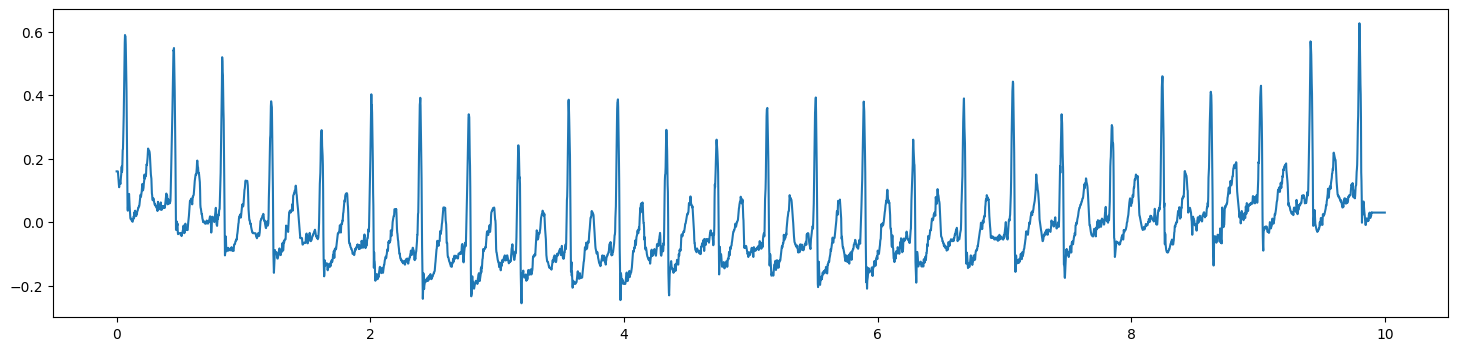

SR


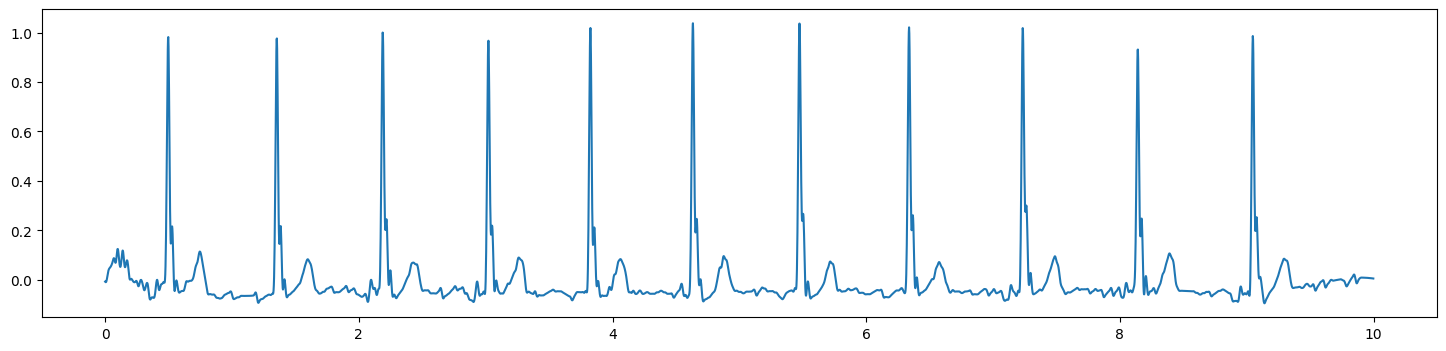

SR


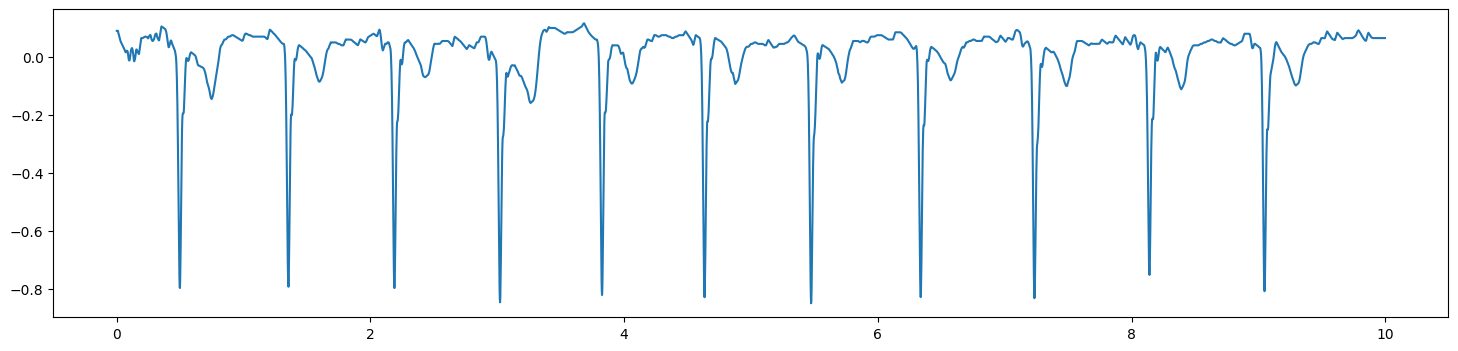

SR


In [62]:
plt.figure(figsize=(18, 4))
plt.plot(y, dict_by_rythm['AFLT'][0][:,0])
plt.show()
print(ritmo)

plt.figure(figsize=(18, 4))
plt.plot(y, X_filt)
plt.show()
print(ritmo)


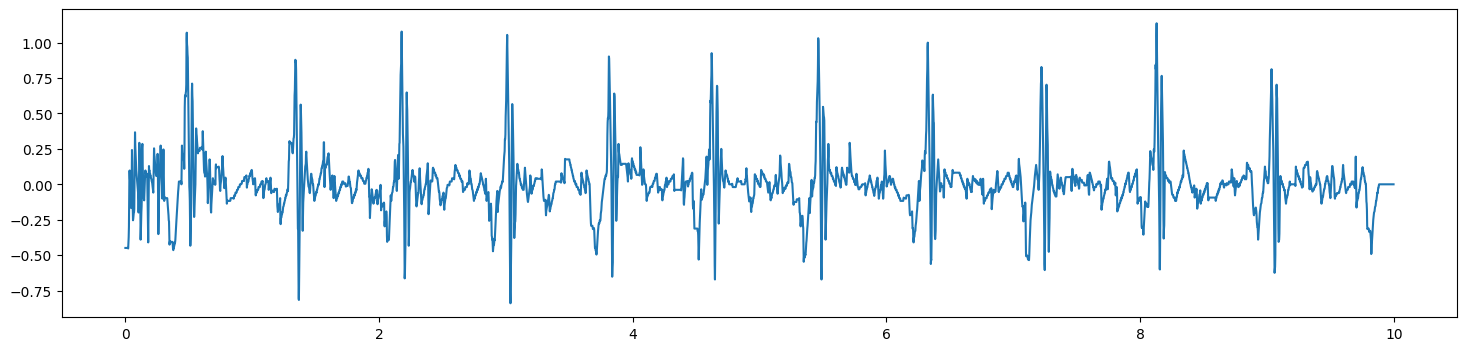

SR


In [93]:
plt.figure(figsize=(18, 4))
plt.plot(y, X_filt)
plt.show()
print(ritmo)